# Final Project Exploratory Analysis
Melissa Medeiros - September 19, 2018

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import datetime as dt

# Import and clean the data sets
There is a time series for chickenpox, measles and mumps

In [95]:
chickenpox = pd.read_csv('nyc_chickenpox.csv', converters={'Month':pd.to_datetime})
chickenpox.columns = ['month','chickenpox']

measles = pd.read_csv('nyc_measles.csv', converters={'Month':pd.to_datetime})
measles.columns = ['month','measles']

mumps = pd.read_csv('nyc_mumps.csv', converters={'Month':pd.to_datetime})
mumps.columns = ['month','mumps']

In [80]:
print('Chickenpox start: {}, end: {}'.format(chickenpox.month[0], chickenpox.month[len(chickenpox)-1]))
print('Measles start: {}, end: {}'.format(measles.month[0], measles.month[len(measles)-1]))
print('Mumps start: {}, end: {}'.format(mumps.month[0], mumps.month[len(mumps)-1]))

Chickenpox start: 1931-01-01 00:00:00, end: 1972-06-01 00:00:00
Measles start: 1928-01-01 00:00:00, end: 1972-06-01 00:00:00
Mumps start: 1928-01-01 00:00:00, end: 1972-06-01 00:00:00


## Combine the data sets 
All three time series end June 1972, but measles/mumps start before chickenpox

In [90]:
data = measles.merge(mumps.merge(chickenpox, how='left'), how='left')
data.head()

,month,measles,mumps,chickenpox
0,1928-01-01,609,124,NaN
1,1928-02-01,1516,132,NaN
2,1928-03-01,4952,193,NaN
3,1928-04-01,7466,144,NaN
4,1928-05-01,11155,195,NaN


In [91]:
data.tail() # note: chickenpox has been converted to a float since it now includes NaN values

,month,measles,mumps,chickenpox
529,1972-02-01,35,157,463.0
530,1972-03-01,40,219,690.0
531,1972-04-01,31,221,847.0
532,1972-05-01,41,264,1121.0
533,1972-06-01,32,298,1048.0


## Save 1971 and beyond as the 'future'
We will ignore this for all our EDA and training / testing

In [93]:
the_future = data[data.month>='1970-1-1']
data = data[data.month<'1970-1-1']

In [99]:
data.tail()

,month,measles,mumps,chickenpox
499,1969-08-01,76,283,142.0
500,1969-09-01,31,158,82.0
501,1969-10-01,39,223,96.0
502,1969-11-01,36,212,166.0
503,1969-12-01,46,333,288.0


# EDA

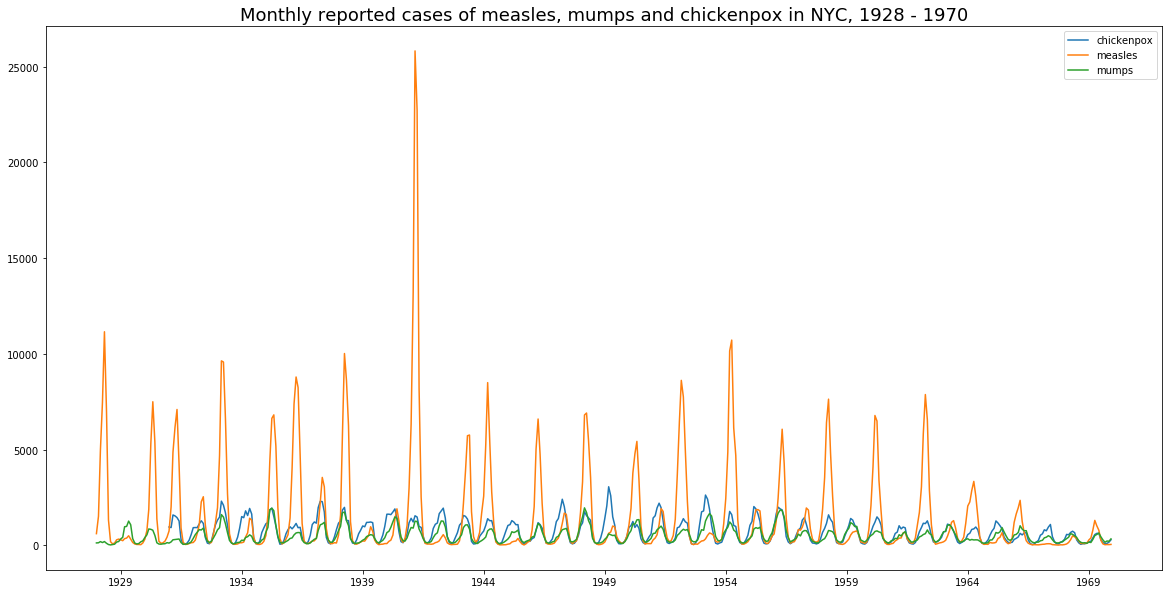

In [101]:
# Plot all the series - measles are clearly on a different scale
plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of measles, mumps and chickenpox in NYC, 1928 - 1970', fontsize=18)
plt.plot(data.month, data[['chickenpox','measles','mumps']])
plt.legend(['chickenpox','measles','mumps'])
plt.show()

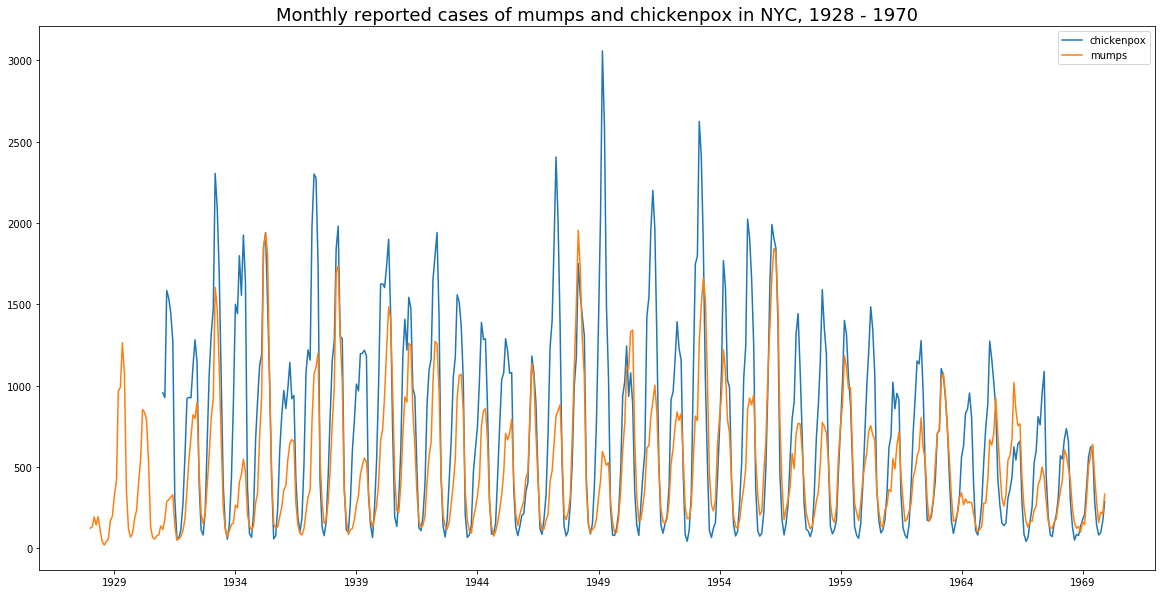

In [102]:
# Plot mumps and chickenpox - measles are obscuring these
plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of mumps and chickenpox in NYC, 1928 - 1970', fontsize=18)
plt.plot(data.month, data[['chickenpox','mumps']])
plt.legend(['chickenpox','mumps'])
plt.show()

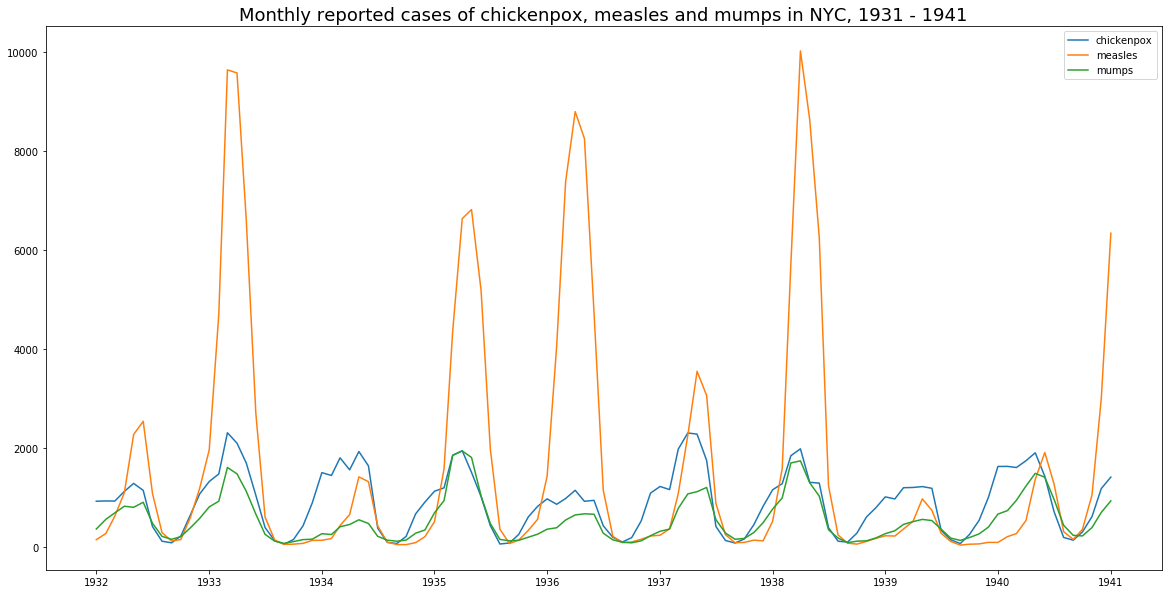

In [183]:
# Plot all three over a shorter time period
plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of chickenpox, measles and mumps in NYC, 1931 - 1941', fontsize=18)
plt.plot(data.month[48:157], data[['chickenpox','measles','mumps']][48:157]) 
plt.legend(['chickenpox','measles','mumps'])
plt.show()

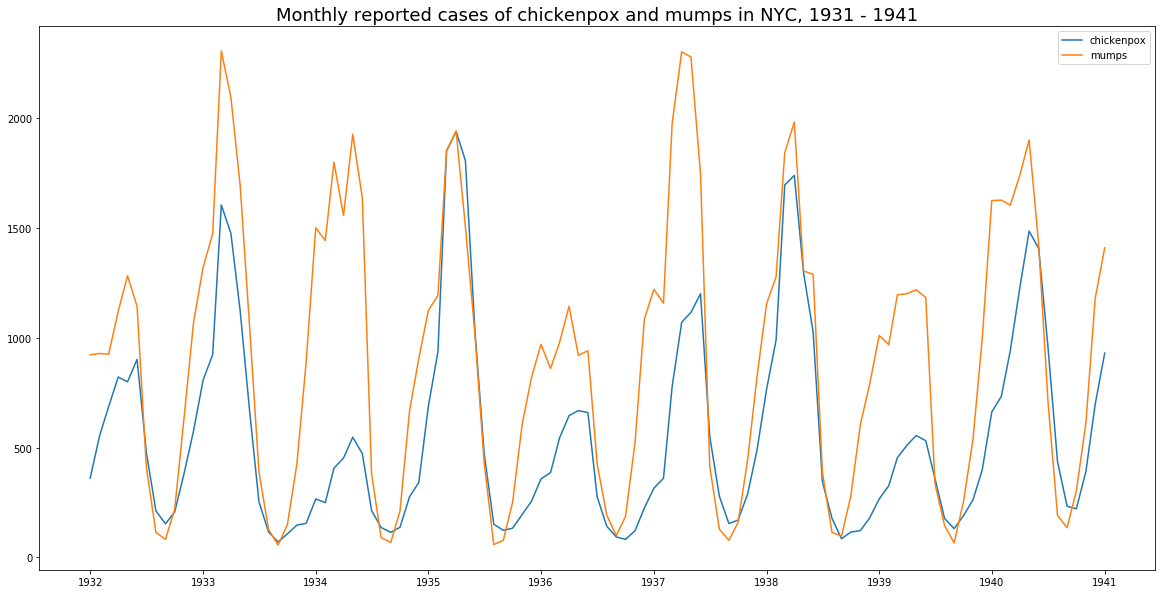

In [184]:
# Plot mumps + chickenpox over a shorter time period
plt.figure(figsize=(20,10))
plt.title('Monthly reported cases of chickenpox and mumps in NYC, 1931 - 1941', fontsize=18)
plt.plot(data.month[48:157], data.mumps[48:157])  
plt.plot(data.month[48:157], data.chickenpox[48:157])  
plt.legend(['chickenpox','mumps'])
plt.show()

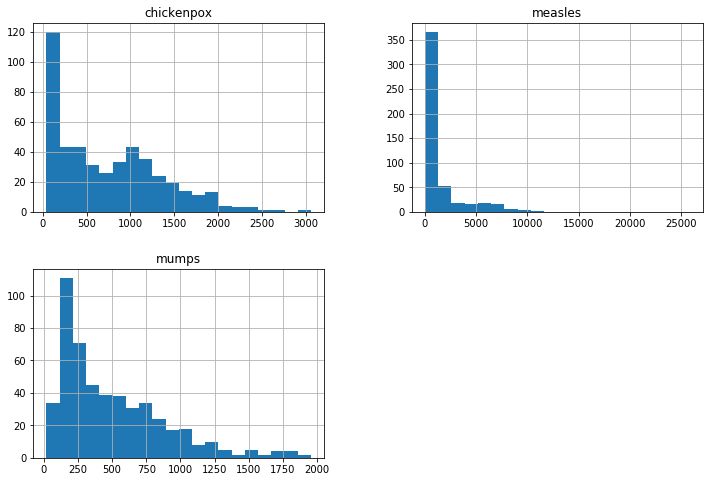

In [185]:
# See the distributions of each
data.hist(bins=20, figsize=(12,8))
plt.show()

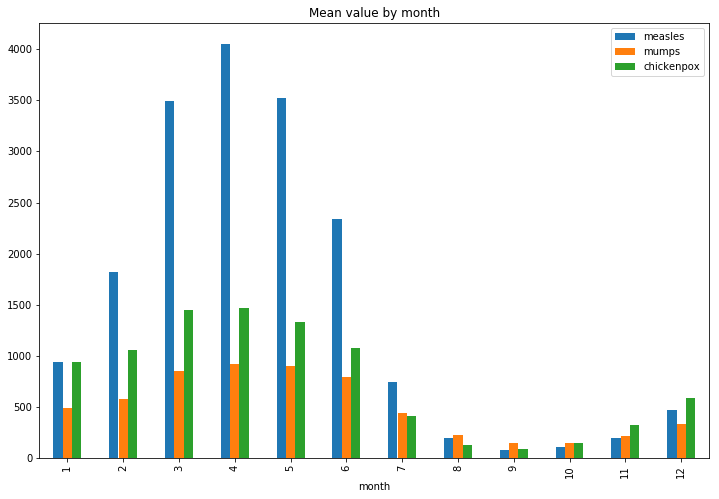

In [148]:
data.groupby(data.month.dt.month).mean().plot(kind='bar', figsize=(12,8))
plt.title('Mean value by month')
plt.show()

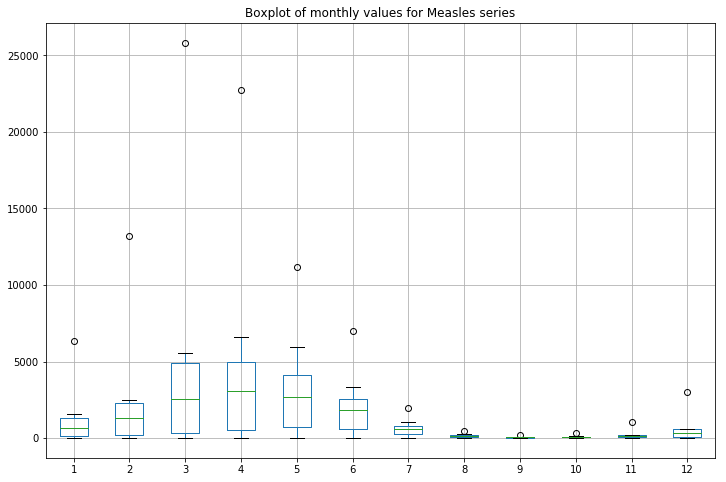

In [254]:
data.groupby(data.month.dt.month).measles.describe().T.boxplot(figsize=(12,8))
plt.title('Boxplot of monthly values for Measles series')
plt.show()

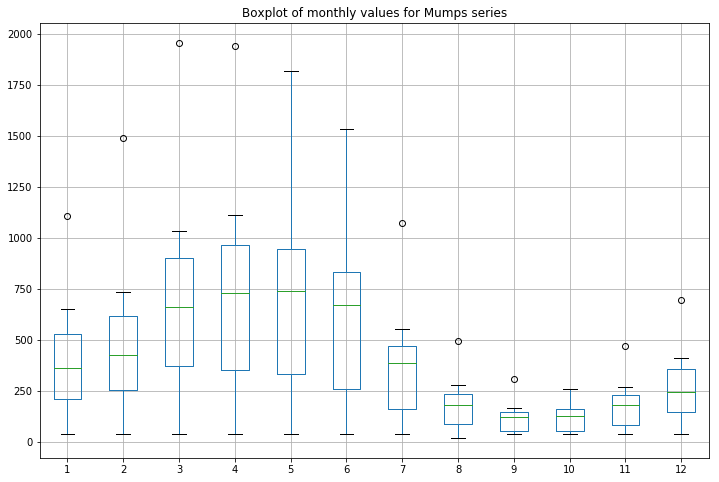

In [255]:
data.groupby(data.month.dt.month).mumps.describe().T.boxplot(figsize=(12,8))
plt.title('Boxplot of monthly values for Mumps series')
plt.show()

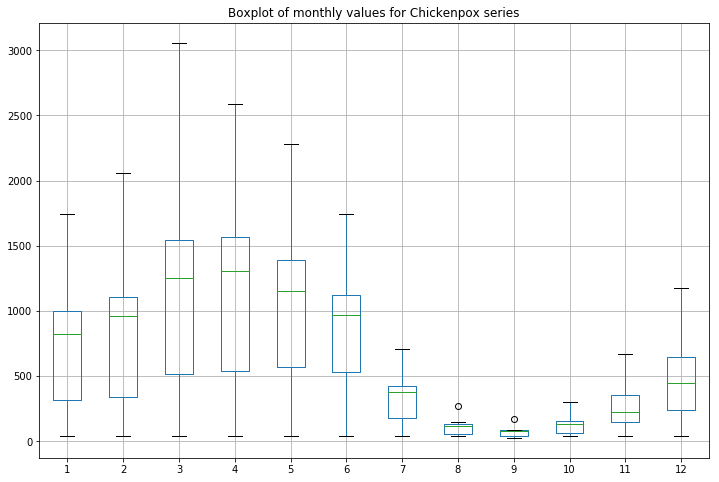

In [256]:
data.groupby(data.month.dt.month).chickenpox.describe().T.boxplot(figsize=(12,8))
plt.title('Boxplot of monthly values for Chickenpox series')
plt.show()

Month 1:


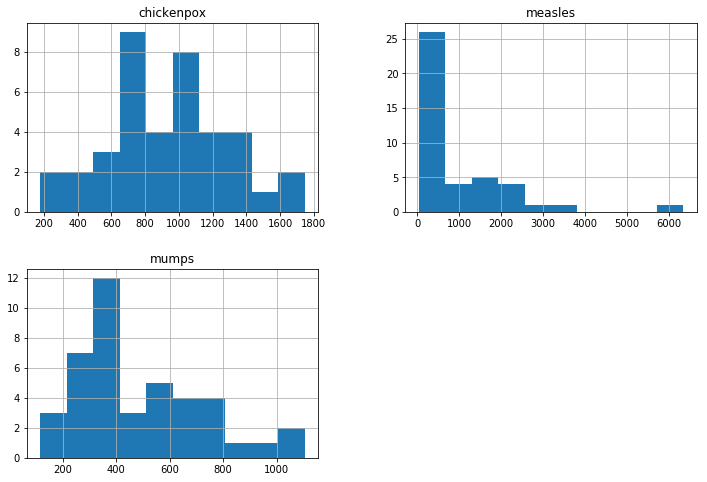


Month 2:


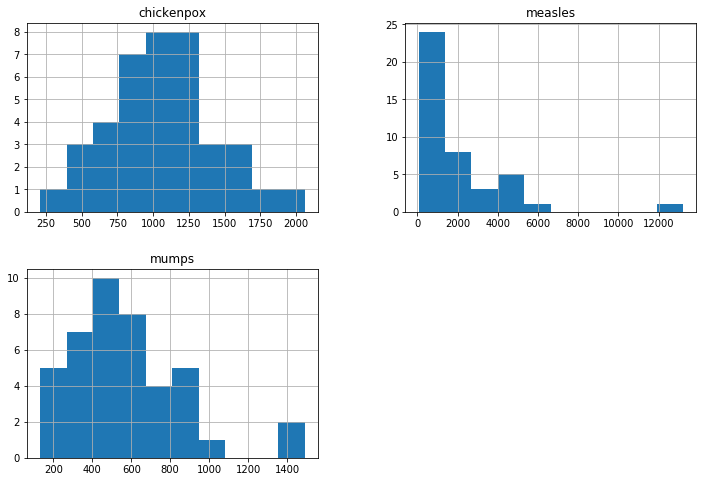


Month 3:


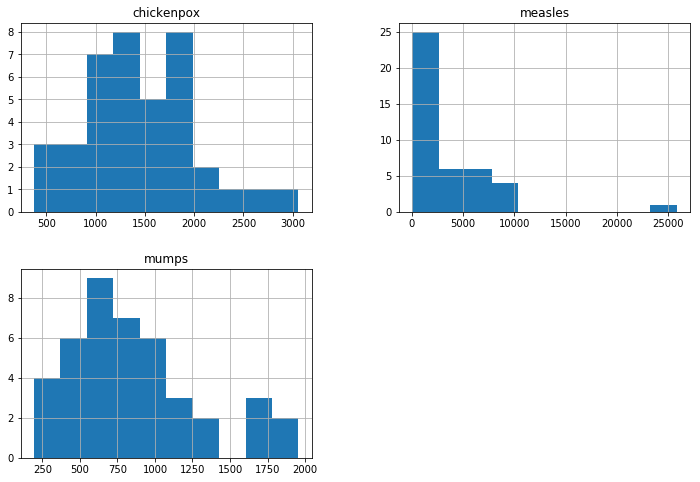


Month 4:


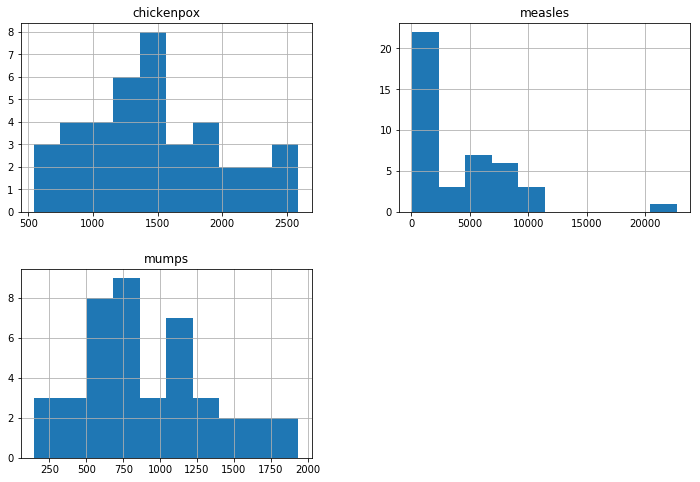


Month 5:


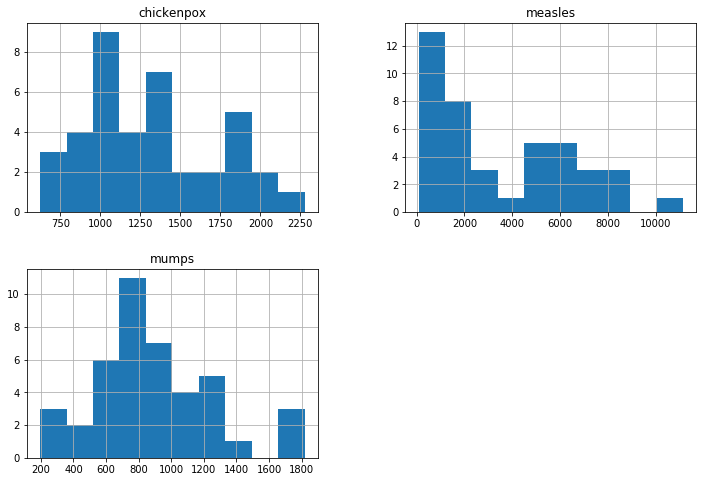


Month 6:


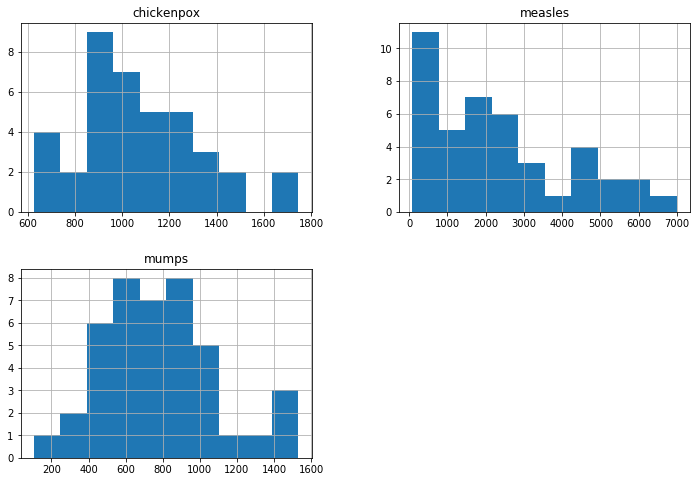


Month 7:


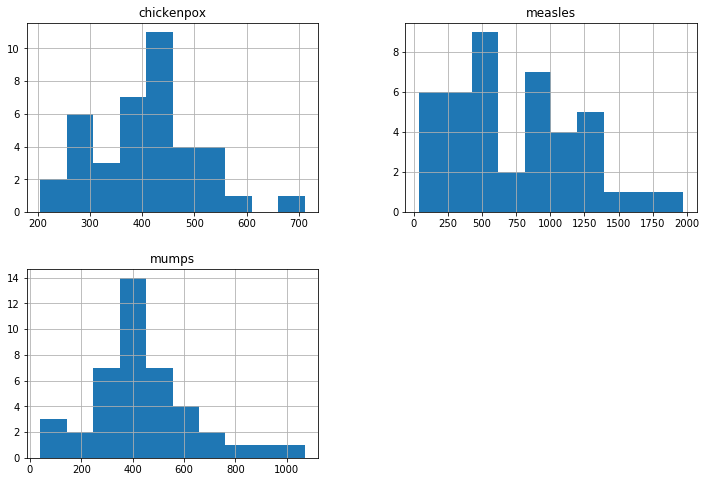


Month 8:


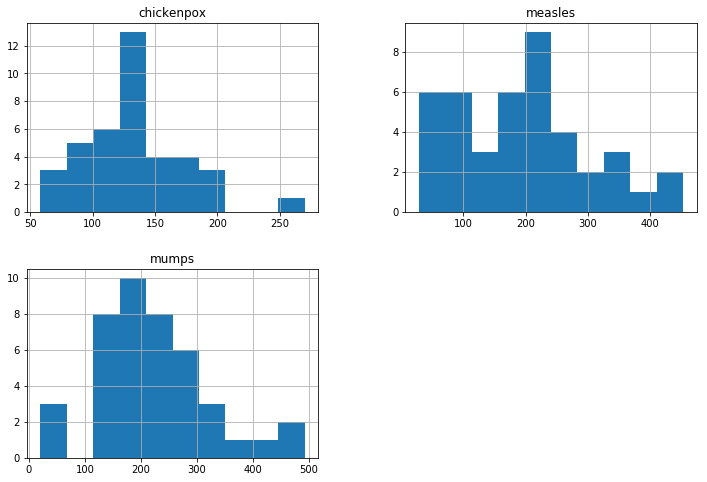


Month 9:


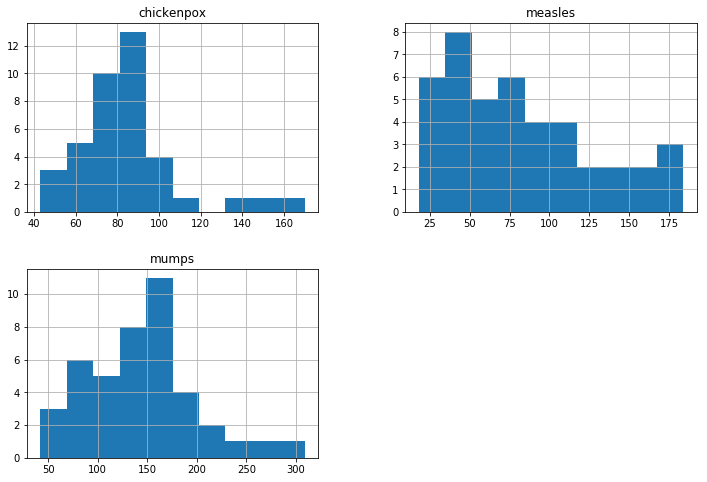


Month 10:


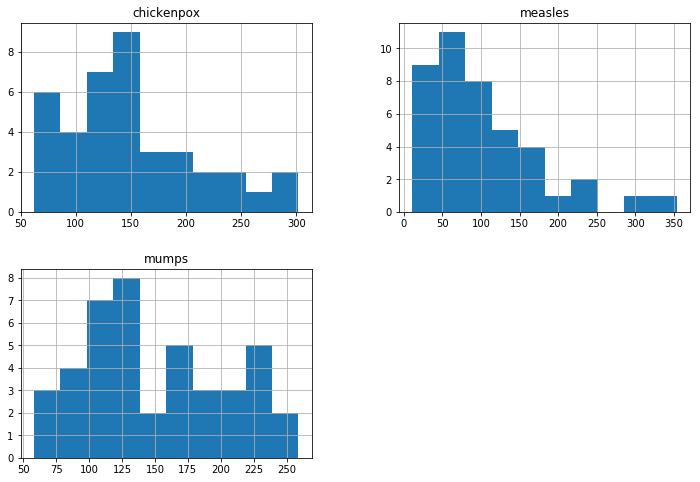


Month 11:


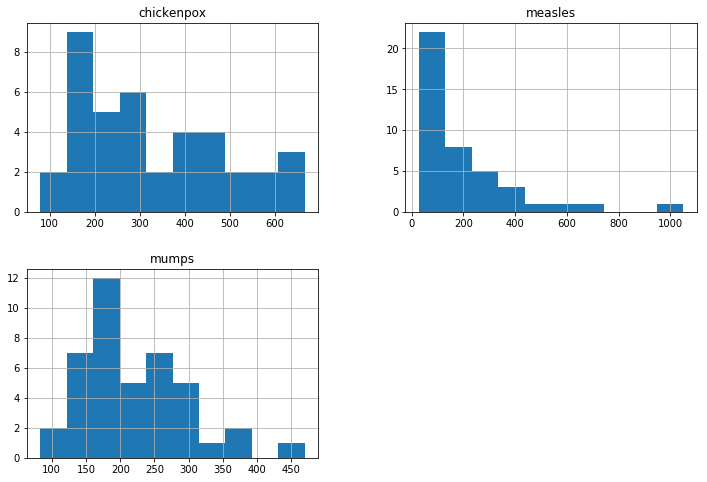


Month 12:


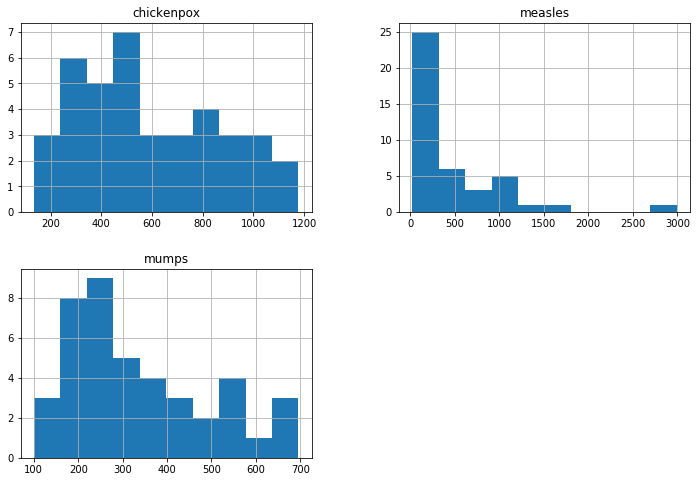

In [200]:
# check histograms by month
for x in list(range(12)):
    x = x + 1
    print('Month {}:'.format(x))
    data[data['month'].dt.month==x].hist(figsize=(12,8))
    plt.show()
    print('')

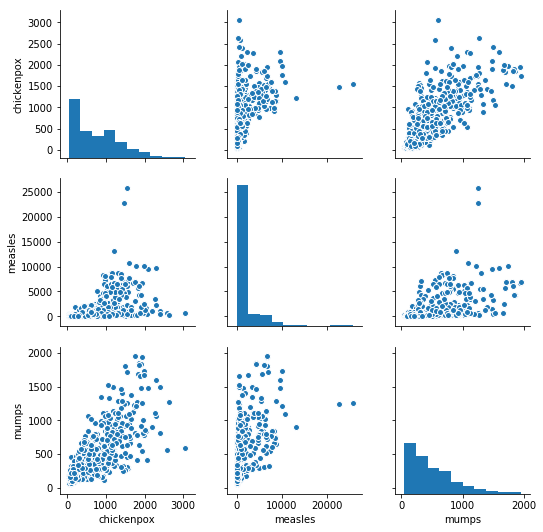

In [221]:
# are the series correlated with each other?
sns.pairplot(data.dropna()[['chickenpox','measles','mumps']])
plt.show()

In [222]:
data.dropna()[['chickenpox','measles','mumps']].corr()

,chickenpox,measles,mumps
chickenpox,1.000000,0.451929,0.754180
measles,0.451929,1.000000,0.540955
mumps,0.754180,0.540955,1.000000


# Time series analysis - mumps

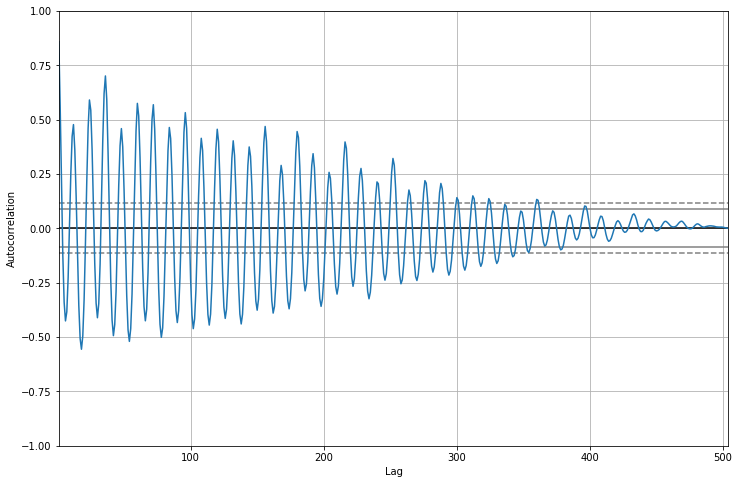

In [270]:
# check if autocorrelation is 'high' for a certain lag
plt.figure(figsize=(12,8))
autocorrelation_plot(data.mumps)
plt.show()

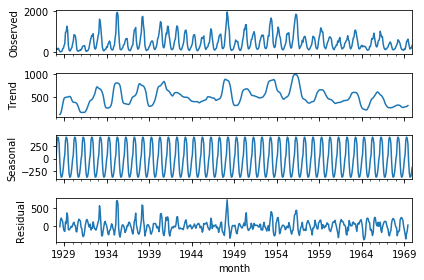

In [285]:
# quick decompose the series
from statsmodels.tsa.seasonal import seasonal_decompose 
mumps_series = data[['month','mumps']].set_index('month')
result = seasonal_decompose(mumps_series, model='additive') # model options = additive or multiplicative
result.plot()
plt.show()

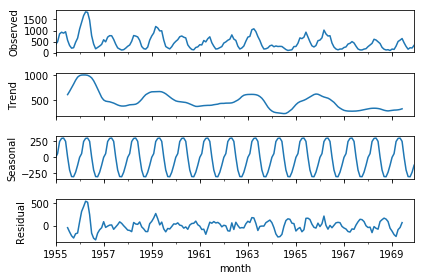

In [293]:
# what does it look like for a shorter, more recent period?
short_mumps_series = data[data.month>='1955-1-1'][['month','mumps']].set_index('month')
result = seasonal_decompose(short_mumps_series, model='additive') # model options = additive or multiplicative
result.plot()
plt.show()

# Appendix

### Potential features
- Months since start of series (time increasing)
- Year
- Month of year
- Seasons: spring, fall, winter
- Weather: average high temp, average low temp
- Child population in NYC (or total population) 

### Research / reading:
- https://en.wikipedia.org/wiki/Mumps
- https://en.wikipedia.org/wiki/Mumps_vaccine
- https://www1.nyc.gov/assets/doh/downloads/pdf/bicentennial/historical-booklet.pdf
- https://people.maths.bris.ac.uk/~magpn/Research/LSTS/STSIntro.html (features these datasets)

### Notes on mumps:
- Before the introduction of a vaccine, mumps was a common childhood disease worldwide.
- Larger outbreaks of disease would typically occur every two to five years. 
- Children between the ages of five and nine were most commonly affected.
- In the more northerly and southerly regions of the world it is more common in the winter and spring.
- First (short-term) vaccine invented in 1948, improved vaccines became commercially available in the 1960s.